In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
import os


In [2]:
main_path = 'C:\\Users\\joaopaulo\\Desktop\\Gla_data\\PP EPC FULL'

#Statistical dataframe
stat_folder = 'C:\\Users\\joaopaulo\\Desktop\\Gla_data\\Downloads and data\\02 2 - Median Housing & Sales'
stat_file = 'Mean Residential Prices by LSOA - Dataset47.csv'
stat_loc = os.path.join(stat_folder, stat_file)
df_stat = pd.read_csv(stat_loc, header=1)

#ML Comparation results dataframe
ml_compare_file = 'df_compare_index.csv'
ml_compare_path = os.path.join(main_path, ml_compare_file)
df_ml_results = pd.read_csv(ml_compare_path)

#MAP paths dataframe
oa_path = 'C:\\Users\\joaopaulo\\Desktop\\Gla_data\\GIS Boundaries\\statistical-gis-boundaries-london\\ESRI'
oa_file = 'OA_2011_London_gen_MHW.shp'
oa_shp_path = os.path.join(str(oa_path), oa_file)
df_map = gpd.read_file(oa_shp_path)

print('Done')

Done


In [3]:
#Head of Statistical file:
print(df_stat.shape)
# print(df.head())
df_stat.head()

(34753, 50)


4 Local authority code Local authority name  LSOA code        LSOA name  \
0  5            E06000001           Hartlepool  E01011949  Hartlepool 009A   
1  6            E06000001           Hartlepool  E01011950  Hartlepool 008A   
2  7            E06000001           Hartlepool  E01011951  Hartlepool 007A   
3  8            E06000001           Hartlepool  E01011952  Hartlepool 002A   
4  9            E06000001           Hartlepool  E01011953  Hartlepool 002B   

   Year ending Mar 2010  Year ending Jun 2010  Year ending Sep 2010  \
0          79571.428571          95934.545455          89685.333333   
1          61111.111111          57853.571429          55897.222222   
2          70080.434783          67519.047619          55784.210526   
3          78415.833333          61398.600000          82563.833333   
4          70000.000000          63999.600000          48142.285714   

   Year ending Dec 2010  Year ending Mar 2011  ...  Year ending Dec 2018  \
0          94455.652174          91558.333333  ...          76691.176471   
1          61352.500000          61102.500000  ...          38737.960000   
2          54784.210526          55500.000000  ...          61047.380952   
3          88197.571429          91814.666667  ...          65300.000000   
4          46799.600000          49331.454545  ...          65250.000000   

   Year ending Mar 2019  Year ending Jun 2019  Year ending Sep 2019  \
0          75962.500000          83126.315789          88196.666667   
1          41497.368421          41328.571429          42584.482759   
2          59300.000000          67374.750000          61962.894737   
3          73000.000000          69327.777778          69316.666667   
4          61900.000000          59949.900000          75404.454545   

   Year ending Dec 2019  Year ending Mar 2020  Year ending Jun 2020  \
0          82463.333333          95746.875000          92785.714286   
1          40783.928571          55862.121212          56000.000000   
2          58563.611111          57349.736842          35283.333333   
3          69731.250000          88316.666667          94983.333333   
4          97158.083333         101060.500000         118684.800000   

   Year ending Sep 2020  Year ending Dec 2020  Year ending Mar 2021  
0          96807.692308          96843.750000          92692.307692  
1          56599.966667          57848.393939          47886.625000  
2          37090.823529          46667.760000          49175.517241  
3                   NaN                   NaN                   NaN  
4         142300.000000         128819.000000         137600.333330  

[5 rows x 50 columns]

In [4]:
df_stat['Mean 2011'] = df_stat[['Year ending Mar 2011', 'Year ending Jun 2011', 'Year ending Sep 2011', 'Year ending Dec 2011']].mean(axis=1)
df_stat['Mean 2020/21'] = df_stat[['Year ending Jun 2020', 'Year ending Sep 2020', 'Year ending Dec 2020', 'Year ending Mar 2021']].mean(axis=1)


df_stat = df_stat[['LSOA code', 'Year ending Mar 2011', 'Year ending Mar 2021', 'Mean 2011', 'Mean 2020/21']]

df_stat.head()

LSOA code  Year ending Mar 2011  Year ending Mar 2021     Mean 2011  \
0  E01011949          91558.333333          92692.307692  87035.297368   
1  E01011950          61102.500000          47886.625000  57295.037072   
2  E01011951          55500.000000          49175.517241  65946.227106   
3  E01011952          91814.666667                   NaN  95564.833333   
4  E01011953          49331.454545         137600.333330  55091.644886   

    Mean 2020/21  
0   94782.366072  
1   54583.746402  
2   42054.358526  
3   94983.333333  
4  131851.033332

In [5]:
#Head of ML file
df_ml_results.columns

Index(['Unnamed: 0', 'county', 'district', 'oa11', 'lsoa11', 'msoa11',
       'postcode', 'ADDRESS', 'price_paid_gla', 'price_paid_gla3',
       'price_paid_df_y_test', 'predicted_pp', 'difference',
       'difference msoa11', 'difference oa11', 'difference lsoa11',
       'difference postcode'],
      dtype='object')

In [6]:
df_ml_results = df_ml_results[[ 'lsoa11', 'predicted_pp', 'difference lsoa11']]
print(df_ml_results.head())
print()
print(df_ml_results.describe())

      lsoa11   predicted_pp  difference lsoa11
0  E01000745  295410.735000           0.143068
1  E01000053  104517.125000           0.117009
2  E01003183  431658.593750           0.163752
3  E01000209  990932.681250           0.128299
4  E01000243  177099.939375           0.208121

       predicted_pp  difference lsoa11
count  6.041940e+05      604194.000000
mean   5.312468e+05           0.949394
std    5.325574e+05          58.355294
min    6.792125e+04           0.015376
25%    2.865772e+05           0.128146
50%    3.987697e+05           0.158695
75%    5.819596e+05           0.193867
max    2.335735e+07        4365.275003


In [7]:
#Eliminate some columns from df_map:
df_map.columns

Index(['OA11CD', 'LSOA11CD', 'MSOA11CD', 'WD11CD_BF', 'WD11NM_BF', 'LAD11CD',
       'LAD11NM', 'RGN11CD', 'RGN11NM', 'LSOA11NM', 'MSOA11NM', 'USUALRES',
       'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'geometry'],
      dtype='object')

In [8]:
#Head of map Shape file
df_map = df_map[['LSOA11CD', 'geometry']]
print(df_map.shape)
df_map.head()

(25053, 2)


LSOA11CD                                           geometry
0  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...
1  E01000692  POLYGON ((543581.516 171132.486, 543704.000 17...
2  E01004615  POLYGON ((526613.539 171839.165, 526546.840 17...
3  E01004027  POLYGON ((533563.521 179695.146, 533351.118 17...
4  E01004613  POLYGON ((527822.000 172020.000, 527979.000 17...

<AxesSubplot:>

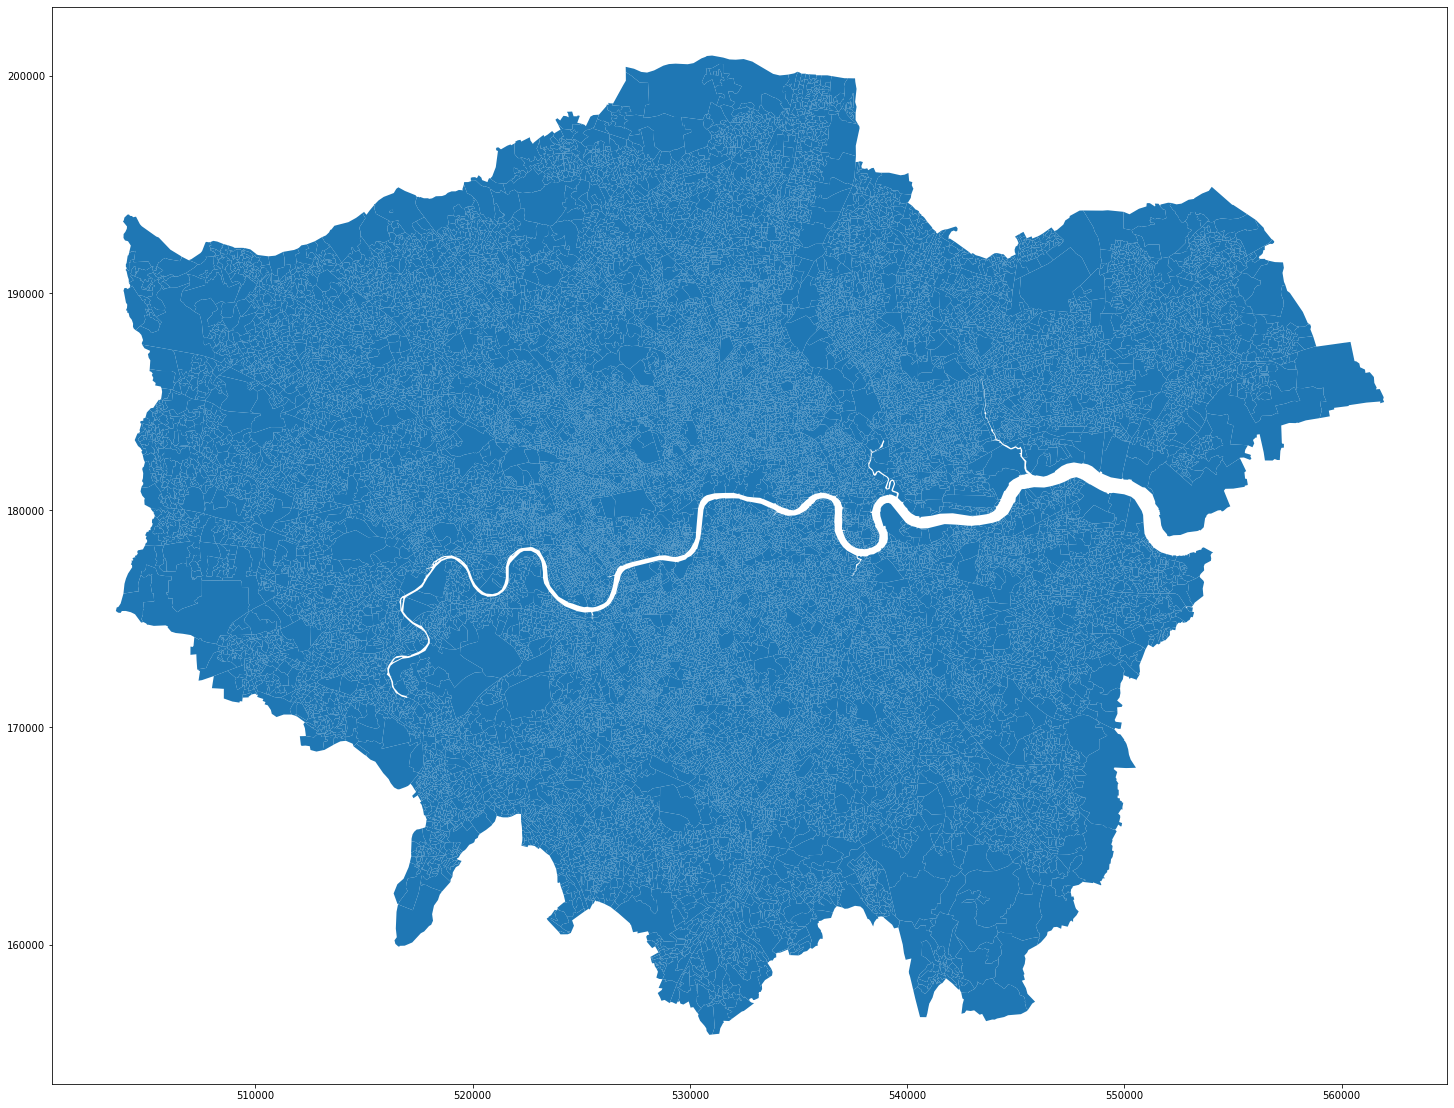

In [9]:
plt.rcParams['figure.figsize'] = [25, 35]
df_map.plot()

In [10]:
#Merge df with shp dataset
# merged_stat = df_map.set_index('OA11CD').join(df_stat.set_index('oa11')) #This turns oas as indexes.
merged_stat = df_map.merge(df_stat, how='left', left_on='LSOA11CD', right_on='LSOA code')
merged_stat = merged_stat.merge(df_ml_results, how='left', left_on='LSOA11CD', right_on='lsoa11')
merged_stat.columns

Index(['LSOA11CD', 'geometry', 'LSOA code', 'Year ending Mar 2011',
       'Year ending Mar 2021', 'Mean 2011', 'Mean 2020/21', 'lsoa11',
       'predicted_pp', 'difference lsoa11'],
      dtype='object')

In [11]:
#Limiting columns of merged Statistical dataframe
merged_stat = merged_stat[['LSOA code', 'geometry', 'Year ending Mar 2011', 'Year ending Mar 2021', 'Mean 2011', 'Mean 2020/21', 'predicted_pp', 'difference lsoa11']]
merged_stat.head()

LSOA code                                           geometry  \
0  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
1  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
2  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
3  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
4  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   

   Year ending Mar 2011  Year ending Mar 2021      Mean 2011   Mean 2020/21  \
0          278083.33333              614250.0  298696.532633  597614.583332   
1          278083.33333              614250.0  298696.532633  597614.583332   
2          278083.33333              614250.0  298696.532633  597614.583332   
3          278083.33333              614250.0  298696.532633  597614.583332   
4          278083.33333              614250.0  298696.532633  597614.583332   

   predicted_pp  difference lsoa11  
0  471727.27000           0.144531  
1  329137.24500           0.144531  
2  475126.78375           0.144531  
3  349880.54875           0.144531  
4  431945.18625           0.144531

In [12]:
#Converting 2011 and 2021 to log2 scale and quantile for error from ML:

#Log Scales:
merged_stat['log Mar 2011'] = np.log10(merged_stat['Year ending Mar 2011'])
merged_stat['log Mar 2021'] = np.log10(merged_stat['Year ending Mar 2021'])
merged_stat['log Mean 2011'] = np.log10(merged_stat['Mean 2011'])
merged_stat['log Mean 2020/21'] = np.log10(merged_stat['Mean 2020/21'])


#Quantile for ML Error:
lower = merged_stat['difference lsoa11'].quantile(0.3)
upper = merged_stat['difference lsoa11'].quantile(0.97)
# iqr = q2 - q1

# merged_stat['difference lsoa11'] = merged_stat[~((merged_stat['difference lsoa11'] < (q1 - 1.5 * iqr)) |(merged_stat['difference lsoa11'] > (q2 + 1.5 * iqr))).any(axis=1)]
merged_stat['difference lsoa11'] = merged_stat['difference lsoa11'].clip(lower, upper)
merged_stat['log Error lsoa'] = np.log10(merged_stat['difference lsoa11'])

merged_stat.head()

LSOA code                                           geometry  \
0  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
1  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
2  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
3  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   
4  E01004612  POLYGON ((527635.452 171810.058, 527495.957 17...   

   Year ending Mar 2011  Year ending Mar 2021      Mean 2011   Mean 2020/21  \
0          278083.33333              614250.0  298696.532633  597614.583332   
1          278083.33333              614250.0  298696.532633  597614.583332   
2          278083.33333              614250.0  298696.532633  597614.583332   
3          278083.33333              614250.0  298696.532633  597614.583332   
4          278083.33333              614250.0  298696.532633  597614.583332   

   predicted_pp  difference lsoa11  log Mar 2011  log Mar 2021  log Mean 2011  \
0  471727.27000           0.144531      5.444175      5.788345        5.47523   
1  329137.24500           0.144531      5.444175      5.788345        5.47523   
2  475126.78375           0.144531      5.444175      5.788345        5.47523   
3  349880.54875           0.144531      5.444175      5.788345        5.47523   
4  431945.18625           0.144531      5.444175      5.788345        5.47523   

   log Mean 2020/21  log Error lsoa  
0          5.776421       -0.840038  
1          5.776421       -0.840038  
2          5.776421       -0.840038  
3          5.776421       -0.840038  
4          5.776421       -0.840038

In [13]:
print(merged_stat[['Year ending Mar 2011', 'Year ending Mar 2021', 'Mean 2011', 'Mean 2020/21'
                   , 'log Mar 2011', 'log Mar 2021', 'log Mean 2011', 'log Mean 2020/21', 'predicted_pp', 'difference lsoa11', 'log Error lsoa']].describe(include='all'))
print(type(merged_stat))



       Year ending Mar 2011  Year ending Mar 2021     Mean 2011  Mean 2020/21  \
count          3.169030e+06          3.102095e+06  3.208377e+06  3.181109e+06   
mean           3.840674e+05          6.741087e+05  3.861245e+05  6.494215e+05   
std            2.865399e+05          5.181123e+05  2.883269e+05  4.970954e+05   
min            1.078312e+05          1.900000e+05  9.340000e+04  1.549887e+05   
25%            2.284998e+05          4.223429e+05  2.285980e+05  4.062001e+05   
50%            2.972708e+05          5.404394e+05  2.953067e+05  5.168841e+05   
75%            4.216477e+05          7.313353e+05  4.266821e+05  7.034205e+05   
max            3.117076e+06          8.275103e+06  3.493096e+06  9.049839e+06   

       log Mar 2011  log Mar 2021  log Mean 2011  log Mean 2020/21  \
count  3.169030e+06  3.102095e+06   3.208377e+06      3.181109e+06   
mean   5.516583e+00  5.767267e+00   5.518118e+00      5.750990e+00   
std    2.197812e-01  2.055237e-01   2.212483e-01      2.0596

In [14]:
print(merged_stat['log Mar 2011'].max())
print(merged_stat['log Mar 2021'].isnull().sum())
print(merged_stat['difference lsoa11'].isnull().sum())

6.493747417839664
125918
157


<AxesSubplot:title={'center':'2011 Median House Prices (log10)'}>

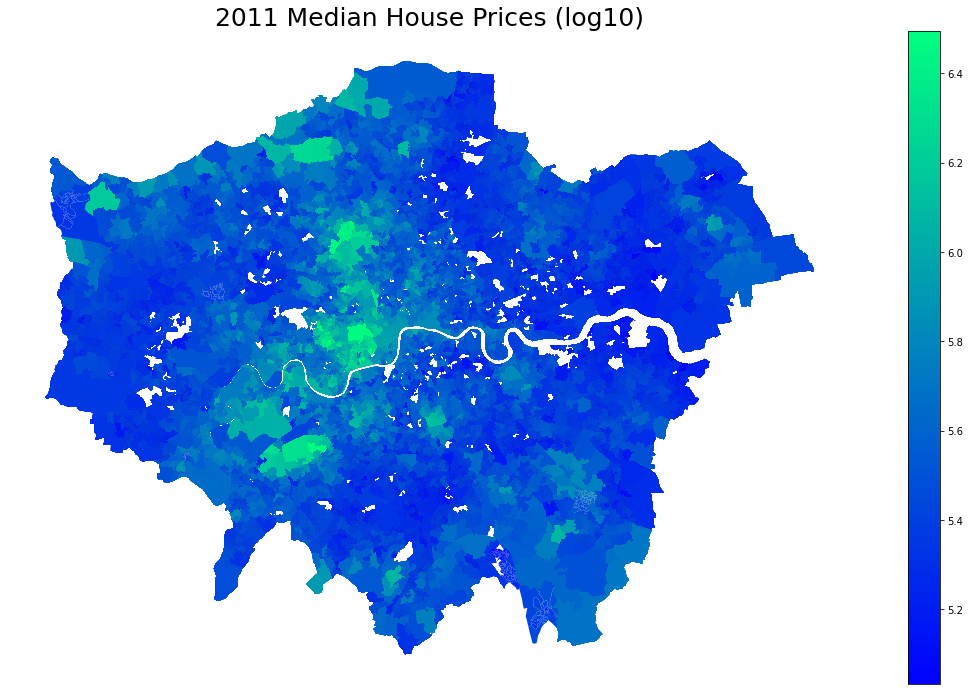

In [15]:
#plot for Year ending Mar 2011

#Set variable that will call what columns we want to visualise on the map:
variable_11 = 'log Mar 2011'

#Range for the chloropleth
vmin, vmax = str(merged_stat['log Mar 2011'].min()), str(merged_stat['log Mar 2011'].max())

#Create figure and axes for Matplotlib
fig2011, ax = plt.subplots(1, figsize=(20, 12))

#remove the axis
ax.axis('off')

#add title and annotation
ax.set_title('2011 Median House Prices (log10)', fontdict={'fontsize': '25', 'fontweight': '3'})

#Create colorbar legend:
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig2011.colorbar(sm)
sm.set_array([]) #Empty the array for the range in colourbar. 


# print('Done')
merged_stat.plot(column=variable_11, cmap='winter', linewidth=0.008, ax=ax, edgecolor='0.8')

#cmaps: Blues, autumn_r, viridis

<AxesSubplot:title={'center':'2021 Median House Prices (log10)'}>

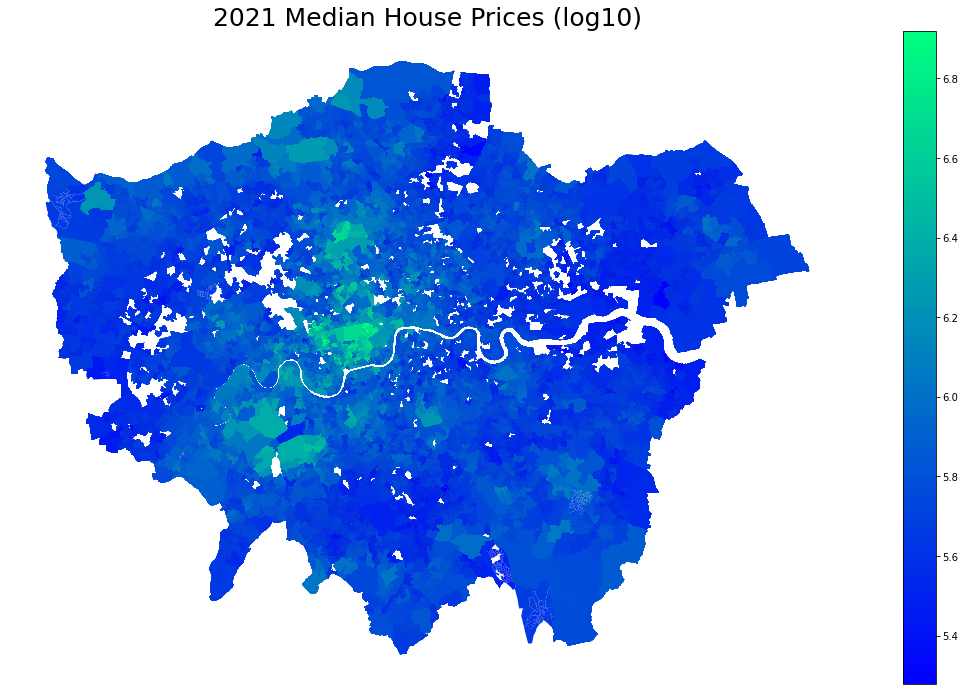

In [16]:
#plot for Year ending Mar 2021

#Set variable that will call what columns we want to visualise on the map:
variable_21 = 'log Mar 2021'

#Range for the chloropleth
vmin, vmax = str(merged_stat['log Mar 2021'].min()), str(merged_stat['log Mar 2021'].max())

#Create figure and axes for Matplotlib
fig2021, ax = plt.subplots(1, figsize=(20, 12))

#remove the axis
ax.axis('off')

#add title and annotation
ax.set_title('2021 Median House Prices (log10)', fontdict={'fontsize': '25', 'fontweight': '3'})

#Create colorbar legend:
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig2021.colorbar(sm)
sm.set_array([]) #Empty the array for the range in colourbar. 


# print('Done')
merged_stat.plot(column=variable_21, cmap='winter', linewidth=0.008, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'2011 Log Mean House Prices'}>

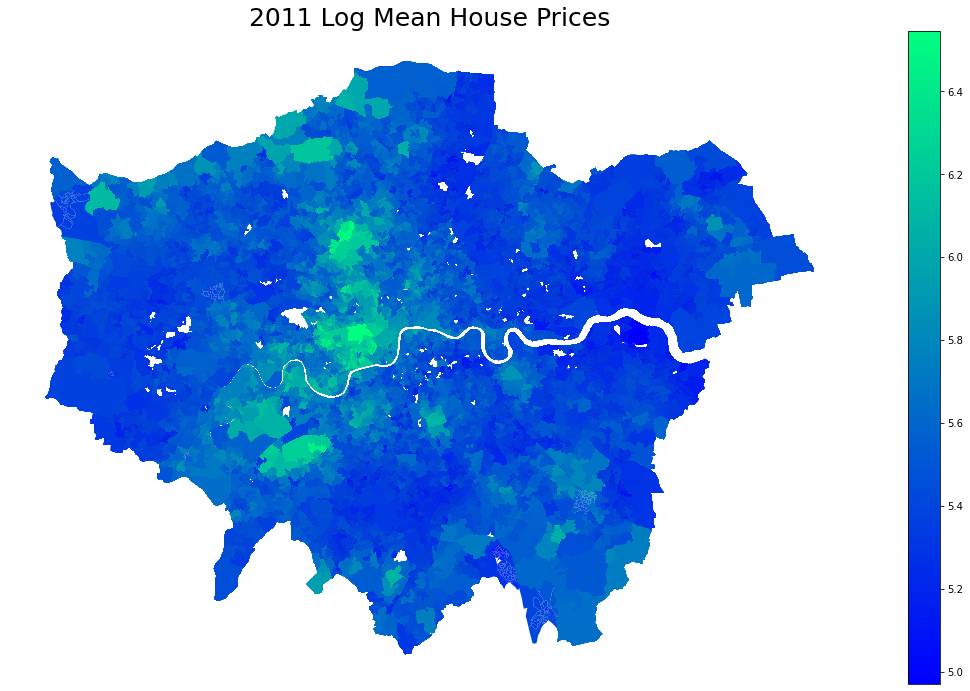

In [17]:
#plot for MEAN Year 2011

#Set variable that will call what columns we want to visualise on the map:
variable_M11 = 'log Mean 2011'

#Range for the chloropleth
vmin, vmax = str(merged_stat['log Mean 2011'].min()), str(merged_stat['log Mean 2011'].max())

#Create figure and axes for Matplotlib
fig2011, ax = plt.subplots(1, figsize=(20, 12))

#remove the axis
ax.axis('off')

#add title and annotation
ax.set_title('2011 Log Mean House Prices', fontdict={'fontsize': '25', 'fontweight': '3'})

#Create colorbar legend:
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig2011.colorbar(sm)
sm.set_array([]) #Empty the array for the range in colourbar. 


# print('Done')
merged_stat.plot(column=variable_M11, cmap='winter', linewidth=0.008, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'2020/21 Log Mean House Prices'}>

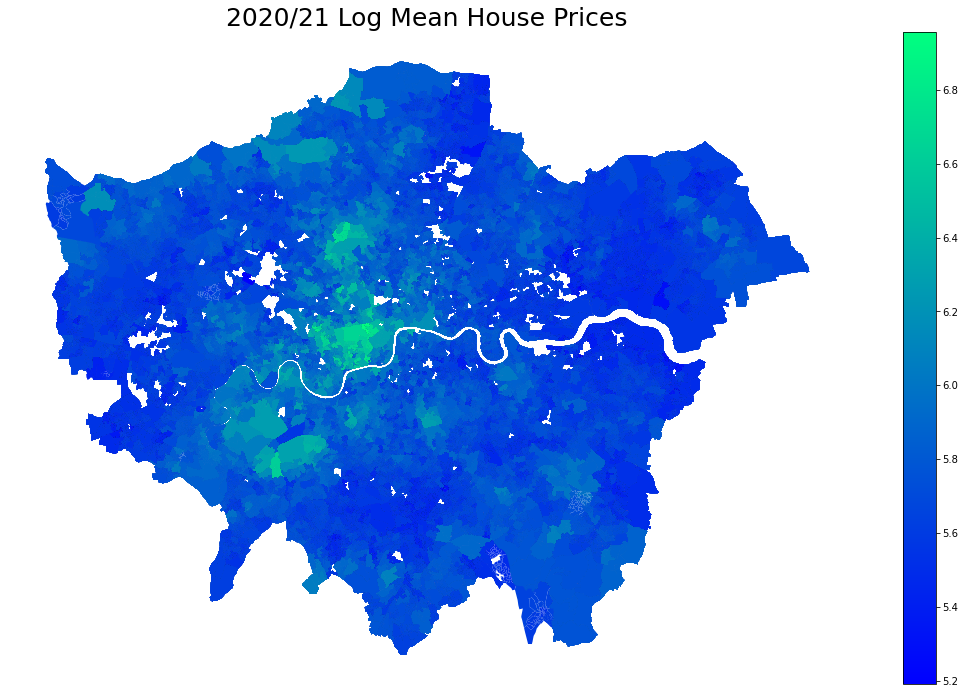

In [18]:
#plot for MEAN Year 2020/21

#Set variable that will call what columns we want to visualise on the map:
variable_M2021 = 'log Mean 2020/21'

#Range for the chloropleth
vmin, vmax = str(merged_stat['log Mean 2020/21'].min()), str(merged_stat['log Mean 2020/21'].max())

#Create figure and axes for Matplotlib
fig_M2021, ax = plt.subplots(1, figsize=(20, 12))

#remove the axis
ax.axis('off')

#add title and annotation
ax.set_title('2020/21 Log Mean House Prices', fontdict={'fontsize': '25', 'fontweight': '3'})

#Create colorbar legend:
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig_M2021.colorbar(sm)
sm.set_array([]) #Empty the array for the range in colourbar. 


# print('Done')
merged_stat.plot(column=variable_M2021, cmap='winter', linewidth=0.008, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Error in ML Algorithm (Gross Difference)'}>

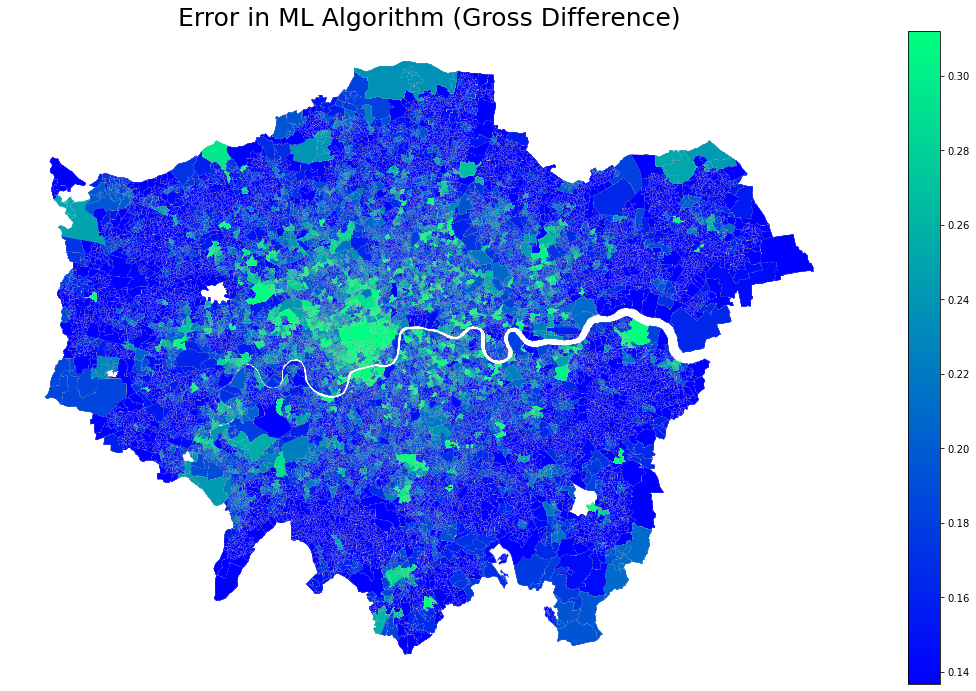

In [19]:
#plot for Difference lsoa11

#Set variable that will call what columns we want to visualise on the map:
variable_dif = 'difference lsoa11'

#Range for the chloropleth
# vmin, vmax = 0.000927, 23.798390
vmin, vmax = str(merged_stat['difference lsoa11'].min()), str(merged_stat['difference lsoa11'].max())

#Create figure and axes for Matplotlib
figML, ax = plt.subplots(1, figsize=(20, 12))

#remove the axis
ax.axis('off')

#add title and annotation
ax.set_title('Error in ML Algorithm (Gross Difference)', fontdict={'fontsize': '25', 'fontweight': '3'})

#Create colorbar legend:
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))
figML.colorbar(sm)
sm.set_array([]) #Empty the array for the range in colourbar. 


# print('Done')
merged_stat.plot(column=variable_dif, cmap='winter', linewidth=0.08, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Log Error in ML Algorithm (Log Gross Difference)'}>

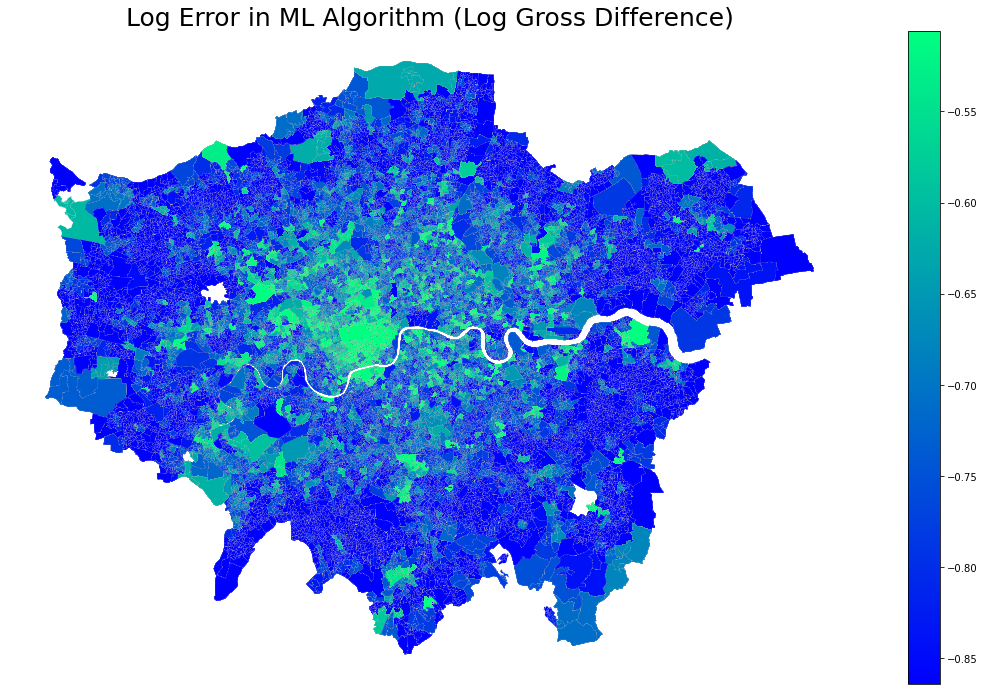

In [20]:
#plot for LOG Difference lsoa11

#Set variable that will call what columns we want to visualise on the map:
variable_dif = 'log Error lsoa'

#Range for the chloropleth
# vmin, vmax = 0.000927, 23.798390
vmin, vmax = str(merged_stat['log Error lsoa'].min()), str(merged_stat['log Error lsoa'].max())

#Create figure and axes for Matplotlib
figML2, ax = plt.subplots(1, figsize=(20, 12))

#remove the axis
ax.axis('off')

#add title and annotation
ax.set_title('Log Error in ML Algorithm (Log Gross Difference)', fontdict={'fontsize': '25', 'fontweight': '3'})

#Create colorbar legend:
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))
figML2.colorbar(sm)
sm.set_array([]) #Empty the array for the range in colourbar. 


# print('Done')
merged_stat.plot(column=variable_dif, cmap='winter', linewidth=0.08, ax=ax, edgecolor='0.8')

In [ ]:
# fig2011.savefig('2011 Median House Prices (log10).png', dpi=600)
# fig2021.savefig('2021 Median House Prices (log10).png', dpi=600)
figML.savefig('Error in ML Algorithm (Gross Difference).png', dpi=600)
fig_M2021.savefig('2020/21 Log Mean House Prices.png', dpi=600)
fig2011.savefig('2020/21 Log Mean House Prices.png', dpi=600)
print('saved')

In [ ]:
# Choosing colours: 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

#Normalising colours:
# https://gis.stackexchange.com/questions/330008/center-normalize-choropleth-colors-in-geopandas

#Througly explanation about choropleth maps and colours:
# https://blog.datawrapper.de/choroplethmaps/

